### In  this  Exploratory Data Analysis we will be working with daily time series of  the Open Power System Data (OPSD) for Germany. The data set includes country-wide totals of electricity consumption, wind  and solar power production. Electricity production and comsumption are in gigawatt-hours (GWh)

Inferences

The result of this analysis showed that


* Electricity consumption as expected is higher in winter



* Solar power production is highest in summer when sunlight is most abundant.



* As expected, wind power production is highest in winter. This could be because of stronger winds and frequent rain storms.



* Over the years,  the trend show there is an increased production in wind power.



* Electricity consumption is higher on weekdays than on weekays and holidays.


*  There are  yearly oscillations between high and low values on a yearly time scale which corresponds to seasonal changes in weather.



* Wind and Solar production as a share of annual electricity consumption has been increasing since 2012. Concretely, there was an increase from about 15% in 2012 to roughly 27% in 2017.


* Electricity consumption has been fairly stable over time while wind power production has been growing steadily with wind+solar power making up a bulk of the electricity consumed.



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:

data=pd.read_csv('/Users/admin/Documents/PandasCookbook_Code/Powerdata.csv')

data.head(5)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [3]:
data.tail(4)

,Date,Consumption,Wind,Solar,Wind+Solar
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [4]:
data.isnull().sum()

Date              0
Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
Date           4383 non-null object
Consumption    4383 non-null float64
Wind           2920 non-null float64
Solar          2188 non-null float64
Wind+Solar     2187 non-null float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [6]:
data.describe(include='all')

,Date,Consumption,Wind,Solar,Wind+Solar
count,4383,4383.000000,2920.000000,2188.000000,2187.000000
unique,4383,NaN,NaN,NaN,NaN
top,2017-08-18,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,1338.675836,164.814173,89.258695,272.663481
std,NaN,165.775710,143.692732,58.550099,146.319884
min,NaN,842.395000,5.757000,1.968000,21.478000
25%,NaN,1217.859000,62.353250,35.179250,172.185500
50%,NaN,1367.123000,119.098000,86.407000,240.991000
75%,NaN,1457.761000,217.900250,135.071500,338.988000


In [7]:
type(pd.to_datetime('2018-01-15 3:45pm'))

pandas._libs.tslib.Timestamp

In [8]:
pd.to_datetime('7/8/1952 3:45pm')

Timestamp('1952-07-08 15:45:00')

In [9]:
pd.to_datetime('7/8/1952 3:45pm',dayfirst=True)

Timestamp('1952-08-07 15:45:00')

In [10]:
pd.to_datetime(['2018-01-05','7/8/1952','Oct 10, 1995'])

DatetimeIndex(['2018-01-05', '1952-07-08', '1995-10-10'], dtype='datetime64[ns]', freq=None)

In [11]:
#For large datasets, specifying the date format helps speeds
#computation


pd.to_datetime(['2/25/10','8/16/17','12/15/12'], format='%m/%d/%y')

DatetimeIndex(['2010-02-25', '2017-08-16', '2012-12-15'], dtype='datetime64[ns]', freq=None)

In [12]:
#Create a time series data frame

data.shape

(4383, 5)

In [13]:
data.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


In [14]:
data.tail(4)

,Date,Consumption,Wind,Solar,Wind+Solar
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


we see from the head and tail that data is available from Jan 2006 to Dec 2017

In [15]:
data.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

The date column must be converted to a date/time index

In [16]:
data['Date']=pd.to_datetime(data['Date'])



In [17]:
data.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

In working with timestamp data, it makes sense to have the date set as the index. Most of the time that will be your independent variable. 

In [18]:
data=data.set_index('Date')

In [19]:
data.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


To make life easier, it is sometimes useful to bundle the above
steps in one line of code like so

In [20]:
data=pd.read_csv('/Users/admin/Documents/PandasCookbook_Code/Powerdata.csv',\
                 index_col=0,parse_dates=True)

In [21]:
data.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


One nice thing about the datetime attribute of the pandas library is it's ability to allow you access the date/time components

In [22]:
data['Year']=data.index.year
data['Month']=data.index.month
data['Weekday Name']=data.index.weekday_name



data.sample(10,random_state=2)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2017-02-26,1208.72500,545.141,59.460,604.601,2017,2,Sunday
2017-09-24,1115.07288,53.474,88.861,142.335,2017,9,Sunday
2006-12-17,1220.18800,NaN,NaN,NaN,2006,12,Sunday
2008-05-07,1379.22100,NaN,NaN,NaN,2008,5,Wednesday
2017-01-17,1649.10400,79.363,22.909,102.272,2017,1,Tuesday
2013-04-09,1376.07900,164.401,90.156,254.557,2013,4,Tuesday
2015-06-28,1064.64200,63.403,186.140,249.543,2015,6,Sunday
2006-10-07,1227.91000,NaN,NaN,NaN,2006,10,Saturday
2017-12-23,1272.17085,748.074,8.450,756.524,2017,12,Saturday


Now we have new columns added to the dataset new columns

# Basics of Time Indexing

In [23]:
#select a specific date

data.loc['2013-04-09']

Consumption     1376.08
Wind            164.401
Solar            90.156
Wind+Solar      254.557
Year               2013
Month                 4
Weekday Name    Tuesday
Name: 2013-04-09 00:00:00, dtype: object

In [24]:
#select a range

data.loc['2015-01-01':'2015-01-10']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2015-01-01,1111.336,325.128,17.079,342.207,2015,1,Thursday
2015-01-02,1300.884,603.558,7.758,611.316,2015,1,Friday
2015-01-03,1265.271,462.953,7.236,470.189,2015,1,Saturday
2015-01-04,1198.854,385.024,19.984,405.008,2015,1,Sunday
2015-01-05,1449.861,216.543,26.524,243.067,2015,1,Monday
2015-01-06,1452.891,117.231,32.888,150.119,2015,1,Tuesday
2015-01-07,1569.872,227.208,17.113,244.321,2015,1,Wednesday
2015-01-08,1586.974,440.320,8.597,448.917,2015,1,Thursday
2015-01-09,1563.293,641.730,6.823,648.553,2015,1,Friday


Now with this time indexing feature, you will understand why it makes sense to have date as your dataframe index

# Partial indexing

This allows you select a subset of the data that match a given string. For example,

In [25]:
data.loc['2011-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2011-02-01,1607.306,76.705,NaN,NaN,2011,2,Tuesday
2011-02-02,1599.595,183.087,NaN,NaN,2011,2,Wednesday
2011-02-03,1572.520,251.078,NaN,NaN,2011,2,Thursday
2011-02-04,1532.522,493.380,NaN,NaN,2011,2,Friday
2011-02-05,1298.435,481.145,NaN,NaN,2011,2,Saturday
2011-02-06,1173.300,374.043,NaN,NaN,2011,2,Sunday
2011-02-07,1472.621,321.045,NaN,NaN,2011,2,Monday
2011-02-08,1505.453,248.573,NaN,NaN,2011,2,Tuesday
2011-02-09,1523.607,49.729,NaN,NaN,2011,2,Wednesday


# Visualizing time series data

we will be using seaborn for plotting

In [26]:
sns.set(rc ={'figure.figsize':(11,4)})

plot the full dataset

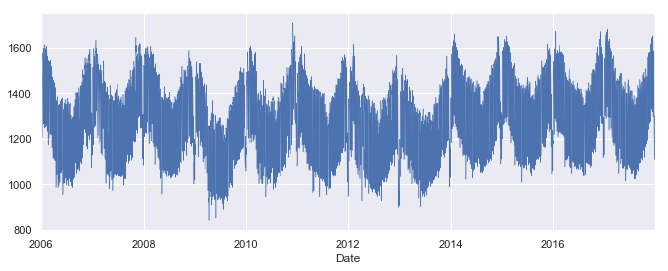

In [27]:
data['Consumption'].plot(linewidth=0.5,color='b')
plt.show()

Too many data points and this makes the graph look crowded. Lets make this better. This time we plot three columns

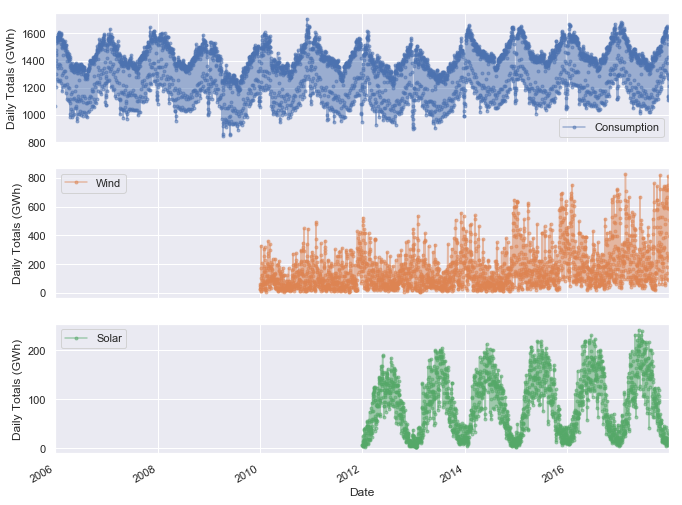

In [28]:
cols=['Consumption','Wind','Solar']
axes=data[cols].plot(marker='.',alpha=0.5,subplots=True,figsize=(11,9))
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')
plt.show()    

let's investigate seasonality more



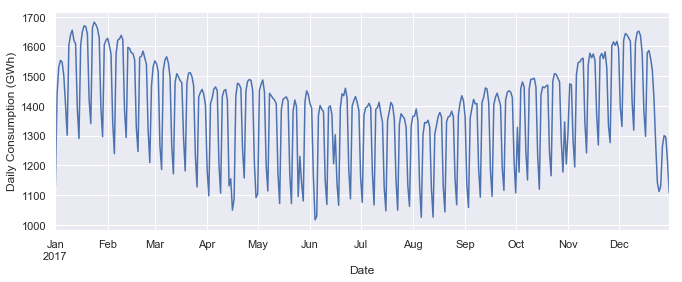

In [98]:
ax=data.loc['2017','Consumption'].plot(color='b')
ax.set_ylabel('Daily Consumption (GWh)')
plt.show()

Zoom in on Jan and Feb alone

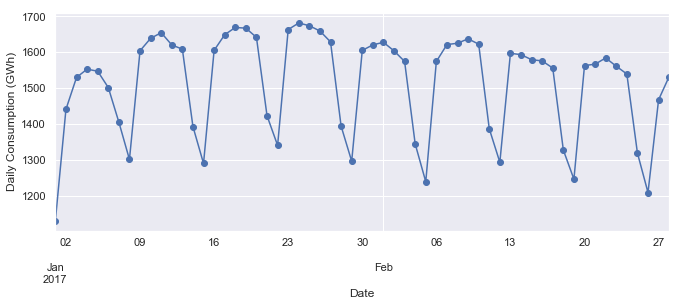

In [101]:
ax=data.loc['2017-01':'2017-02','Consumption'].plot(color='b',marker='o')
ax.set_ylabel('Daily Consumption (GWh)')
plt.show()

The above plot indeed confirms some seasonality in the dataset. As can be seen, consumption is more on the weekdays and lower on the weekends.





Let's use the maplotlib plotting library to make the x-axis more understandable

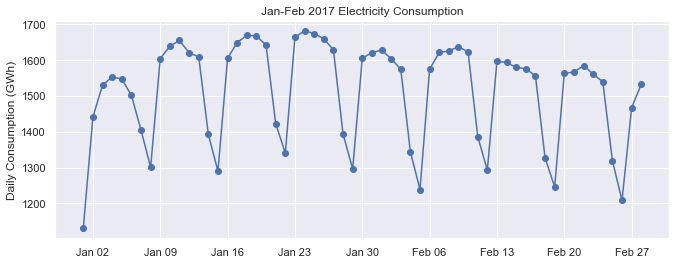

In [29]:
fig,ax=plt.subplots()

ax.plot(data.loc['2017-01':'2017-02','Consumption'],marker='o',\
       linestyle='-')

ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')

#sets x-axis major ticks to weekly interval
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))

#st x-tick labels such that they are 3-letter month name and day number

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.show()

### Seasonality

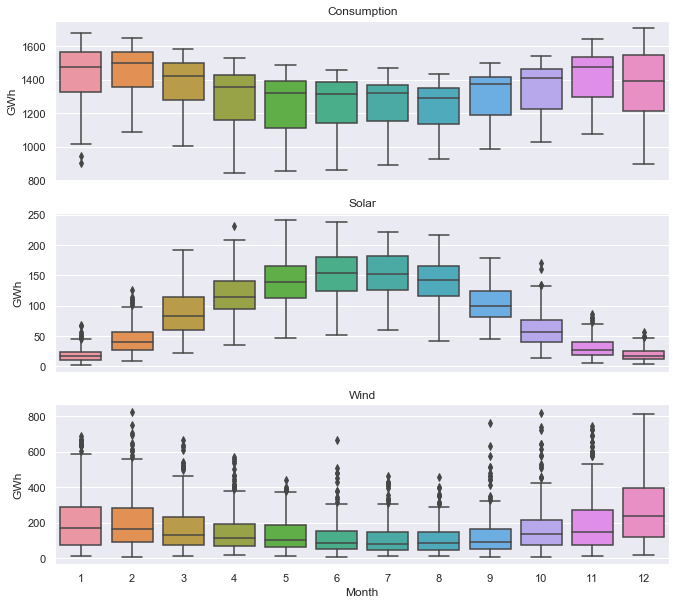

In [30]:
fig,axes=plt.subplots(3,1,figsize=(11,10),sharex=True)
for name, ax in zip(['Consumption','Solar','Wind'],axes ):
    sns.boxplot(data=data,x='Month',y=name,ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    
    if ax!=axes[-1]:
        ax.set_xlabel('')
        
plt.show()        

# Frequencies

In [31]:
#split time into days

pd.date_range('1998-03-10','1998-03-15', freq='D')

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

In [32]:
pd.date_range('2004-09-20', periods=8,freq='H')

DatetimeIndex(['2004-09-20 00:00:00', '2004-09-20 01:00:00',
               '2004-09-20 02:00:00', '2004-09-20 03:00:00',
               '2004-09-20 04:00:00', '2004-09-20 05:00:00',
               '2004-09-20 06:00:00', '2004-09-20 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [33]:
data.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [34]:
times_sample=pd.to_datetime(['2013-02-03','2013-02-06','2013-02-08'])

In [35]:
times_sample

DatetimeIndex(['2013-02-03', '2013-02-06', '2013-02-08'], dtype='datetime64[ns]', freq=None)

In [36]:
consum_sample=data.loc[times_sample,['Consumption']].copy()

In [37]:
consum_sample

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


In [38]:

#downsample into days
consum_freq=consum_sample.asfreq('D')
consum_freq



,Consumption
2013-02-03,1109.639
2013-02-04,NaN
2013-02-05,NaN
2013-02-06,1451.449
2013-02-07,NaN
2013-02-08,1433.098


In [39]:
consum_freq['Consumption-Forward Fill']=consum_sample.asfreq('D', method='ffill')

consum_freq

,Consumption,Consumption-Forward Fill
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


### Resampling

In [46]:

data_columns=['Consumption','Wind','Solar','Wind+Solar']

#Resample to weekly frequency, aggregating with mean

data_mean=data[data_columns].resample('W').mean()

data_mean.tail(3)


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-17,1543.856889,442.531857,18.143714,460.675571
2017-12-24,1440.342401,339.018429,9.895143,348.913571
2017-12-31,1203.265211,604.699143,19.240143,623.939286


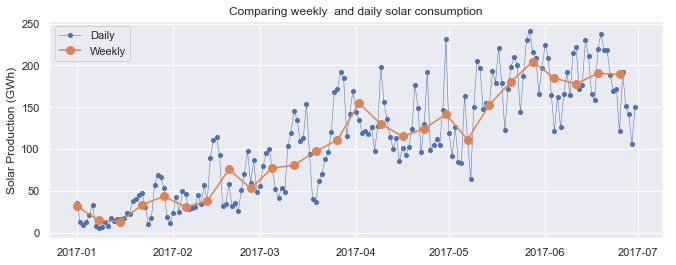

In [58]:
beg, end='2017-01','2017-06'

fig,ax=plt.subplots()

ax.plot(data.loc[beg:end,'Solar'],marker='.',markersize=8,\
        linestyle='-',label='Daily',linewidth=0.5)

ax.plot(data_mean.loc[beg:end, 'Solar'],marker='o',markersize=8,\
       linestyle='-',label='Weekly')

ax.set_ylabel('Solar Production (GWh)')

ax.legend(loc='best')

ax.set_title('Comparing weekly  and daily solar consumption')


plt.show()

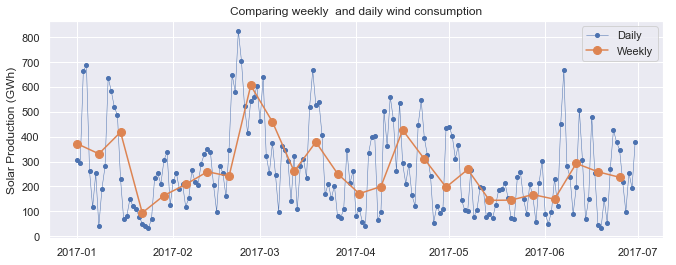

In [62]:
beg, end='2017-01','2017-06'

fig,ax=plt.subplots()

ax.plot(data.loc[beg:end,'Wind'],marker='.',markersize=8,\
        linestyle='-',label='Daily',linewidth=0.5)

ax.plot(data_mean.loc[beg:end, 'Wind'],marker='o',markersize=8,\
       linestyle='-',label='Weekly')

ax.set_ylabel('Solar Production (GWh)')

ax.legend(loc='best')

ax.set_title('Comparing weekly  and daily wind Production')


plt.show()

The resampled data is as expected smoother than the original dataset. We can see a clear increase in solar production whilst wind consumption shows a large variability.  For wind, maximum production is attained in the month of March. 

How does the monthly production look like?

In [76]:
data_monthly=data.resample('M').mean()

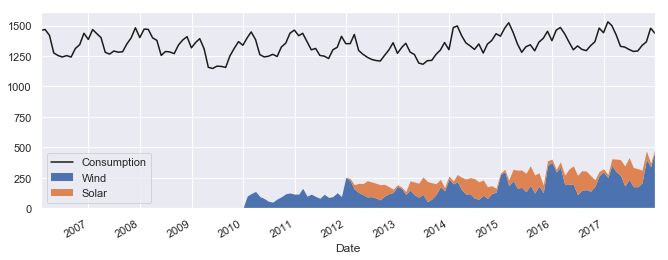

In [78]:
fig,ax=plt.subplots()

ax.plot(data_monthly['Consumption'],color='k',label='Consumption')

data_monthly[['Wind','Solar']].plot.area(ax=ax,linewidth=0)

ax.xaxis.set_major_locator(mdates.YearLocator())

ax.legend(loc='best')





plt.show()

On this time scale, we see that over time, production from wind has been increasing. The same can be said of the solar power. The total monthly consumption is fairly stable. 



It will be worthwhile to resample to annual frequency and compute the ratio of wind+solar to consumption for each year. This will show clearly which contributes more to the total consumption. A graph will make this more apparent. 

In [144]:
data_annual=data[data_columns].resample('A',closed='left',label='right').apply(np.sum)

In [145]:
data_annual.tail(5)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2014-12-31,504049.74000,51136.831,32537.805,83439.159
2015-12-31,505289.97000,77256.175,34890.633,112146.808
2016-12-31,505872.88900,77051.393,34548.470,111599.863
2017-12-31,504841.82251,102261.252,35897.243,138158.495
2018-12-31,1107.11488,721.176,19.980,741.156


In [146]:
data_annual=data_annual.set_index(data_annual.index.year)


In [147]:
data_annual.index.name='Year'

In [148]:
data_annual.tail(4)

,Consumption,Wind,Solar,Wind+Solar
Year,,,,
2015,505289.97000,77256.175,34890.633,112146.808
2016,505872.88900,77051.393,34548.470,111599.863
2017,504841.82251,102261.252,35897.243,138158.495
2018,1107.11488,721.176,19.980,741.156


In [150]:
#Calculate the ratio of Wind and Solar to energy consumption

data_annual['Wind+Solar/Consumption']=data_annual['Wind+Solar']/data_annual['Consumption']

In [151]:
data_annual['Wind+Solar/Consumption'].tail(7)

Year
2012    0.156017
2013    0.166116
2014    0.165538
2015    0.221945
2016    0.220609
2017    0.273667
2018    0.669448
Name: Wind+Solar/Consumption, dtype: float64

In [152]:
data_annual.tail(4)

,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption
Year,,,,,
2015,505289.97000,77256.175,34890.633,112146.808,0.221945
2016,505872.88900,77051.393,34548.470,111599.863,0.220609
2017,504841.82251,102261.252,35897.243,138158.495,0.273667
2018,1107.11488,721.176,19.980,741.156,0.669448


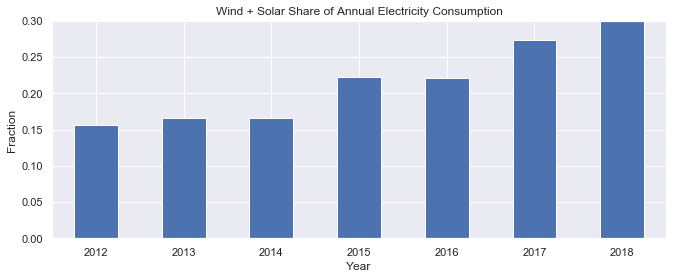

In [154]:
ax=data_annual.loc[2012:, 'Wind+Solar/Consumption'].plot.bar(color='C0')

ax.set_ylabel('Fraction')
ax.set_ylim(0,0.3)
ax.set_title('Wind + Solar Share of Annual Electricity Consumption')
plt.xticks(rotation=0)
plt.show()

### Trends

We can clearly see trends in the dataset by using rolling means at different time scales

In [160]:
data_365=data[data_columns].rolling(window=365,center=True,min_periods=360).mean()

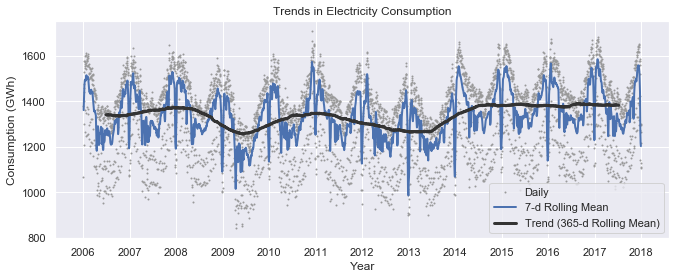

In [166]:
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()

ax.plot(data['Consumption'], marker='.', markersize=2, color='0.6',
linestyle='None', label='Daily')

ax.plot(data_7d['Consumption'], linewidth=2, label='7-d Rolling Mean')

ax.plot(data_365['Consumption'], color='0.2', linewidth=3,
label='Trend (365-d Rolling Mean)')

# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption');
plt.show()

Trends in  wind and solar production

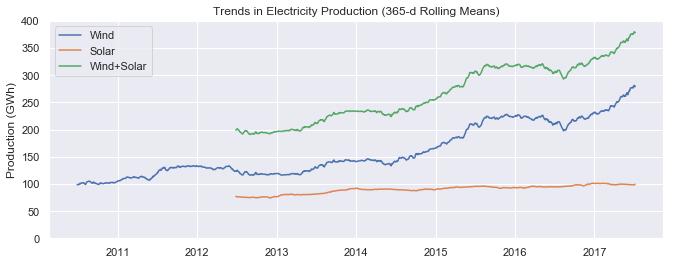

In [169]:
fig, ax = plt.subplots()
for nm in ['Wind', 'Solar', 'Wind+Solar']:
    ax.plot(data_365[nm], label=nm)

# Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.set_ylim(0, 400)
ax.legend()
ax.set_ylabel('Production (GWh)')
ax.set_title('Trends in Electricity Production (365-d Rolling Means)');
plt.show()